SOFTWARE PACKAGES PROJECT

AHMET FURKAN KARAOGLU CSE603
JEPBAROVA DURSUN CSE603

In [276]:
import pandas as pd

In [277]:
df = pd.read_csv("video-game-sales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [278]:
columns = df.columns
columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [279]:
values = df.values
values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [281]:
import matplotlib.pyplot as plt
import numpy as np

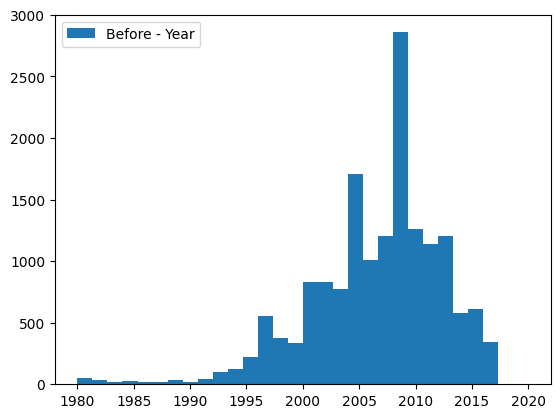

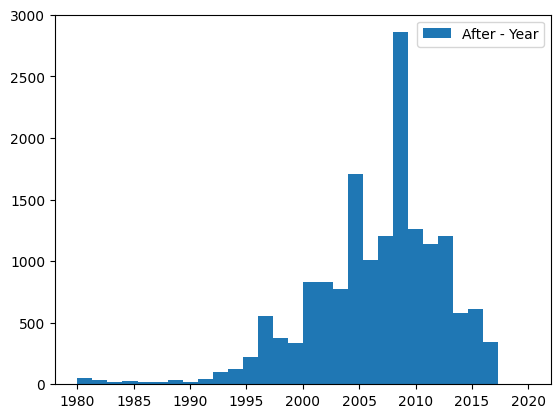

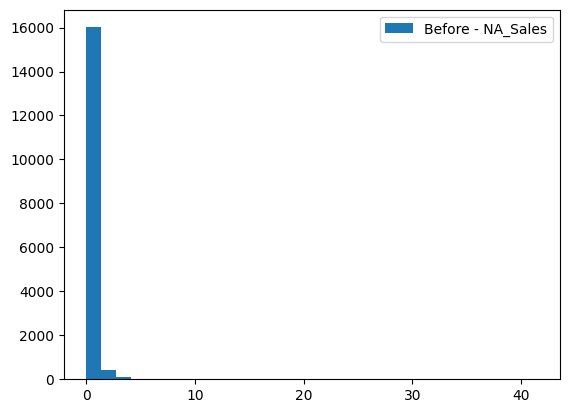

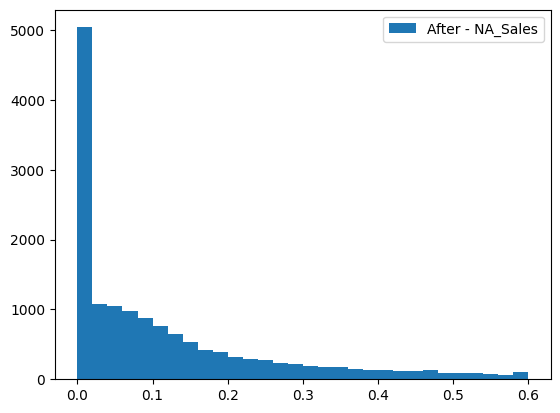

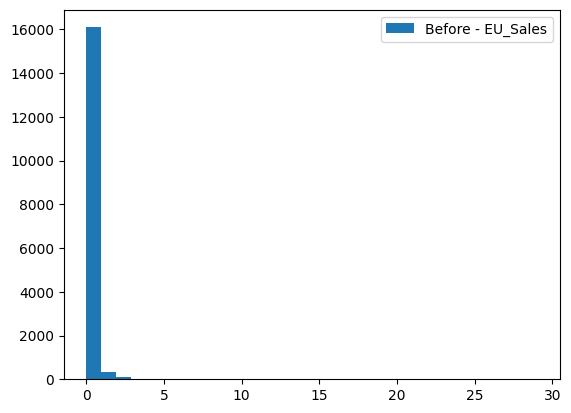

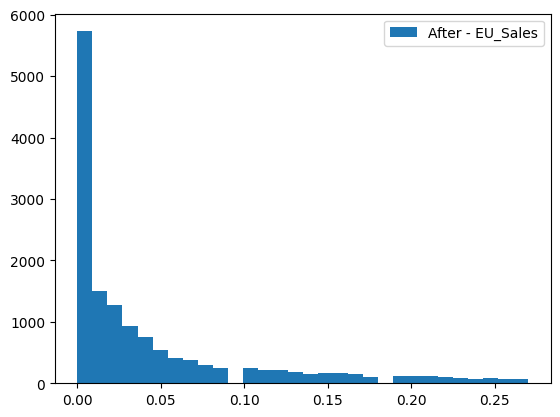

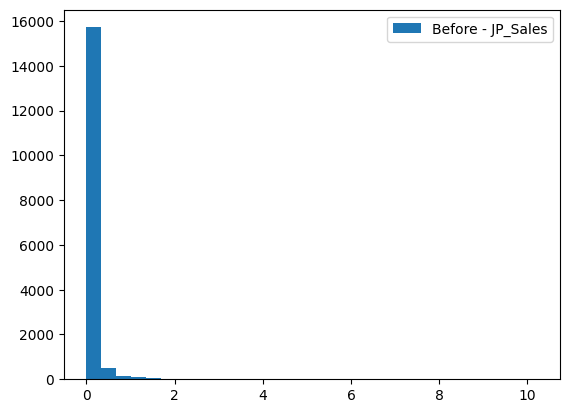

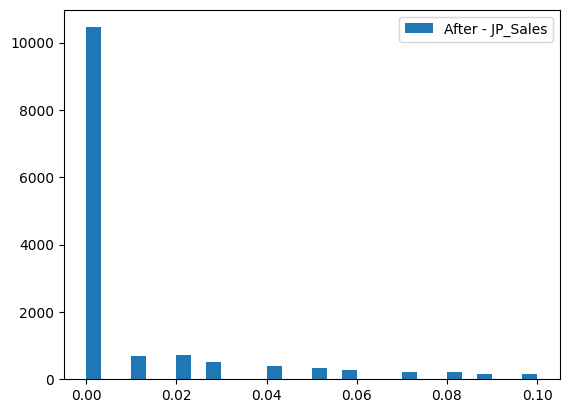

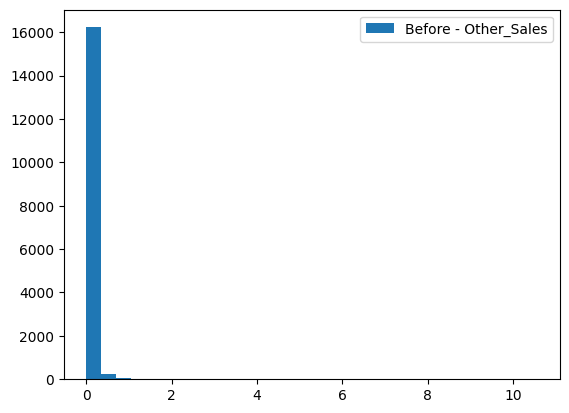

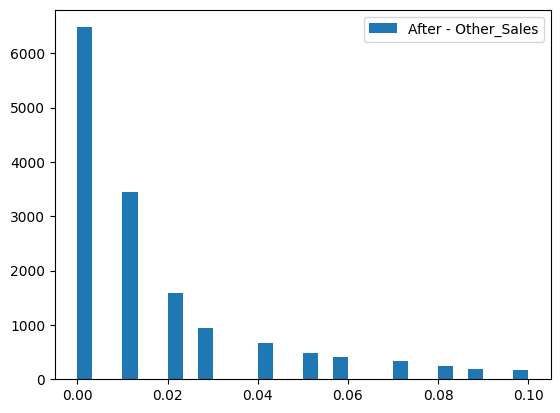

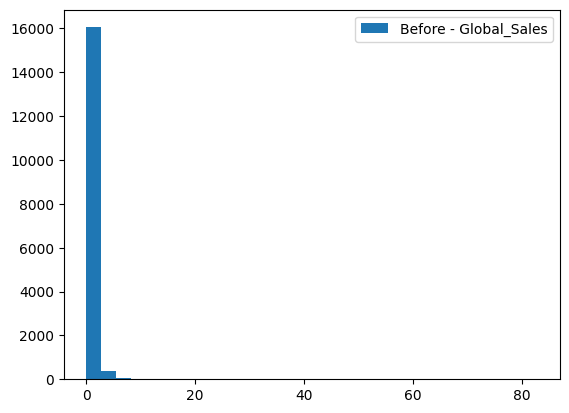

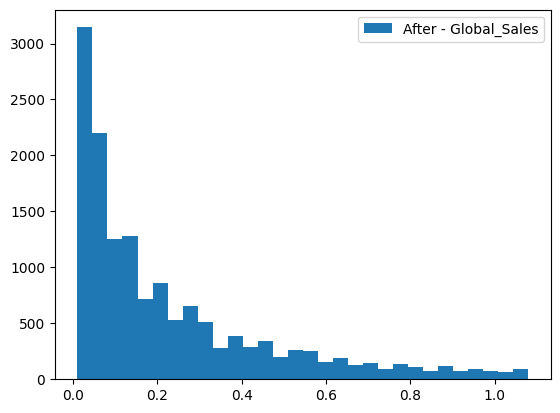

In [282]:
def plot_hist(X, legend):
  _ = plt.figure()
  plt.hist(X, bins=30)
  plt.legend([legend])
  plt.show()


def remove_outliers_iqr(X):
  LQ = np.quantile(X, 0.25)
  UQ = np.quantile(X, 0.75)
  IQR = UQ - LQ
  lower_limit = LQ - 1.5 * IQR
  upper_limit = UQ + 1.5 * IQR

  X[X < lower_limit] = None
  X[X > upper_limit] = None

  return X

def remove_outliers(df):
  for column in df.columns:
    if df[column].dtype != object and df[column].dtype != int:
      X = np.array(df[column].values)
      plot_hist(X, f"Before - {column}")
      X = np.array(df[column].values)
      X = remove_outliers_iqr(X)
      plot_hist(X, f"After - {column}")

df_test = df.drop(["Rank"], axis=1)
remove_outliers(df_test)

In [283]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


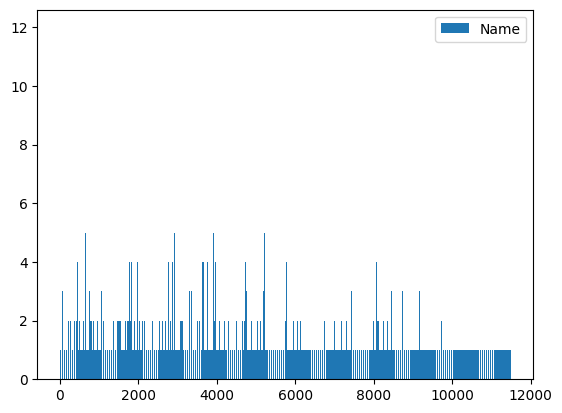

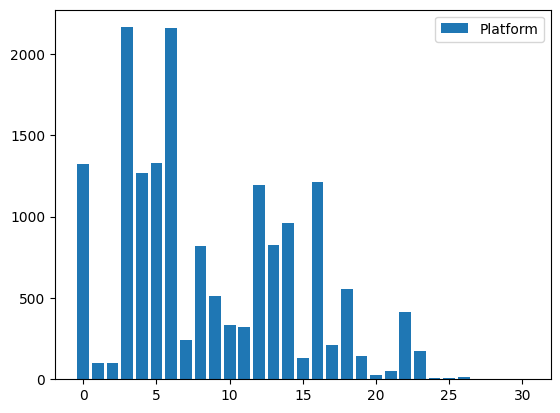

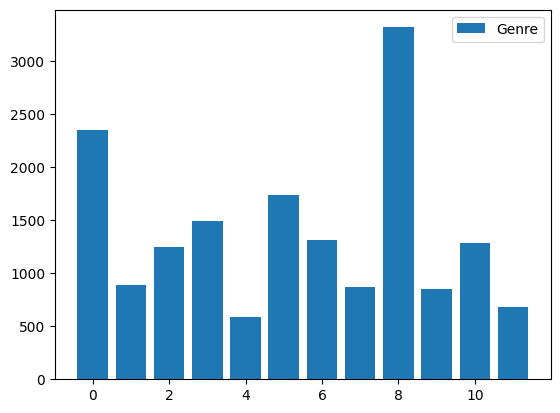

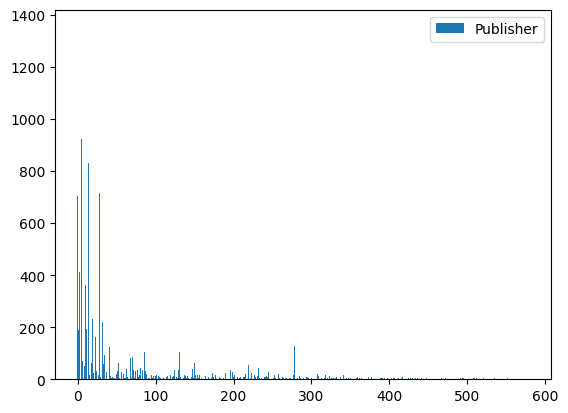

In [284]:
def count_instances(X):
  counts = {}
  for value in X:
    if counts.get(value) is not None:
      counts[value] += 1
    else:
      counts[value] = 1

  return counts

def plot_categorical_hist(counts, legend):
  x = range(len(counts))
  y = list(counts.values())

  _ = plt.figure()
  plt.bar(x, y)
  plt.legend([legend])
  plt.show()

df = pd.read_csv("video-game-sales.csv")
for column in df.columns:
  if df[column].dtype == object:
    X = np.array(df[column].values)
    counts = count_instances(X)
    plot_categorical_hist(counts, column)

In [285]:
cleaned_data = df.drop(["Rank", "Name","Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ], axis=1)
y = cleaned_data["Global_Sales"]
X = cleaned_data.drop("Global_Sales", axis = 1 )
cleaned_data.head()

,Platform,Year,Genre,Global_Sales
0,Wii,2006.0,Sports,82.74
1,NES,1985.0,Platform,40.24
2,Wii,2008.0,Racing,35.82
3,Wii,2009.0,Sports,33.00
4,GB,1996.0,Role-Playing,31.37


In [286]:
import numpy as np

def split_data(cleaned_data):
  y = cleaned_data["Global_Sales"]
  X = cleaned_data.drop("Global_Sales", axis = 1 )
  return y, X

def remove_df_outliers_iqr(df):
  columns = df.columns
  for column in columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      LQ = np.quantile(X, 0.25)
      UQ = np.quantile(X, 0.75)
      IQR = UQ - LQ
      lower_limit = LQ - 1.5 * IQR
      upper_limit = UQ + 1.5 * IQR

      df[df[column] < lower_limit] = None
      df[df[column] > upper_limit] = None
      df = df.dropna()

  return df

In [287]:
df = pd.read_csv("video-game-sales.csv")
cleaned_data = df.drop(["Rank", "Name", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ], axis=1)

In [288]:
platform_dict = {
"DS": 1,
"PS2":2,
"PS3":3,
"Wii":4,
"X360":5,
"PSP":6,
"PS":7,
"PC":8,
"XB":9,
"GBA":10,
"GC":11,
"3DS":12,
"PSV":13,
"PS4":14,
"N64":15,
"SNES":16,
"XOne":17,
"SAT":18,
"WiiU":19,
"2600":20,
"NES":21,
"GB":22,
"DC":23,
"GEN":24,
"NG":25,
"SCD":26,
"WS":27,
"3DO":28,
"TG16":29,
"GG":30,
"PCFX":31
}

genre_dict = {
"Action": 1,
"Sports":2,
"Misc":3,
"Role-Playing":4,
"Shooter":5,
"Adventure":6,
"Racing":7,
"Platform":8,
"Simulation":9,
"Fighting":10,
"Strategy":11,
"Puzzle":12,
}


df2= cleaned_data.replace({"Platform": platform_dict})
df3= df2.replace({"Genre": genre_dict})

In [289]:

df = remove_df_outliers_iqr(df3)
df['Year'] = df['Year'].astype(float)

y, X = split_data(df)
len(X), len(y)


C:\Users\furka\AppData\Local\Temp\ipykernel_18568\2234842609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] < lower_limit] = None
C:\Users\furka\AppData\Local\Temp\ipykernel_18568\2234842609.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[column] > upper_limit] = None


(14149, 14149)

In [290]:
df

,Platform,Year,Genre,Global_Sales
1937,7.0,1998.0,2.0,1.06
1938,2.0,2006.0,10.0,1.06
1939,5.0,2010.0,5.0,1.06
1940,2.0,2002.0,7.0,1.06
1941,1.0,2008.0,3.0,1.06
...,...,...,...,...
16593,10.0,2002.0,8.0,0.01
16594,11.0,2003.0,5.0,0.01
16595,2.0,2008.0,7.0,0.01
16596,1.0,2010.0,12.0,0.01


In [291]:
print (X)

       Platform    Year  Genre
1937        7.0  1998.0    2.0
1938        2.0  2006.0   10.0
1939        5.0  2010.0    5.0
1940        2.0  2002.0    7.0
1941        1.0  2008.0    3.0
...         ...     ...    ...
16593      10.0  2002.0    8.0
16594      11.0  2003.0    5.0
16595       2.0  2008.0    7.0
16596       1.0  2010.0   12.0
16597      10.0  2003.0    8.0

[14149 rows x 3 columns]


In [292]:
print (y)

1937     1.06
1938     1.06
1939     1.06
1940     1.06
1941     1.06
         ... 
16593    0.01
16594    0.01
16595    0.01
16596    0.01
16597    0.01
Name: Global_Sales, Length: 14149, dtype: float64


[Text(0.39451454791826074, 0.975, 'x[0] <= 5.5\nsquared_error = 0.056\nsamples = 11319\nvalue = 0.226'),
 Text(0.1418567146222616, 0.925, 'x[0] <= 1.5\nsquared_error = 0.06\nsamples = 5646\nvalue = 0.248'),
 Text(0.051979300902061855, 0.875, 'x[2] <= 10.5\nsquared_error = 0.042\nsamples = 1605\nvalue = 0.178'),
 Text(0.035401900773195875, 0.825, 'x[2] <= 7.5\nsquared_error = 0.044\nsamples = 1363\nvalue = 0.183'),
 Text(0.014747100515463917, 0.775, 'x[2] <= 1.5\nsquared_error = 0.041\nsamples = 1078\nvalue = 0.173'),
 Text(0.005025773195876289, 0.725, 'x[1] <= 2004.5\nsquared_error = 0.043\nsamples = 258\nvalue = 0.192'),
 Text(0.004510309278350515, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 0.5'),
 Text(0.005541237113402062, 0.675, 'x[1] <= 2011.5\nsquared_error = 0.043\nsamples = 257\nvalue = 0.191'),
 Text(0.003865979381443299, 0.625, 'x[1] <= 2008.5\nsquared_error = 0.042\nsamples = 245\nvalue = 0.193'),
 Text(0.002061855670103093, 0.575, 'x[1] <= 2006.5\nsquared_error = 0.0

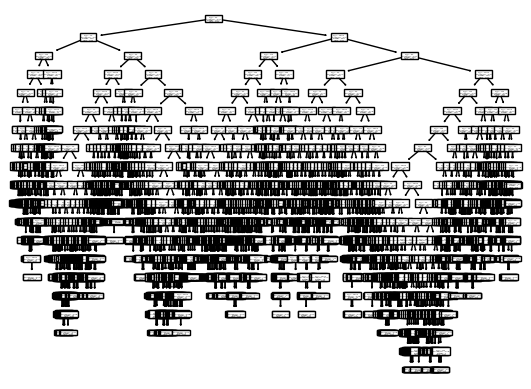

In [293]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeRegressor(max_depth=25)
clf = clf.fit(X_train, y_train)
plot_tree(clf)

In [294]:
y_pred = clf.predict(X_test)

In [295]:
import matplotlib.pyplot as plt

max_depths = [3, 4, 5, 6, 7, 10, 20, 25, 50, 125]
min_samples_leafs = [5, 10, 20, 30, 40, 50]
models = []
for max_depth in max_depths:
  for min_samples_leaf in min_samples_leafs:
    clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    clf = clf.fit(X_train, y_train)
    models.append(clf)

In [296]:
from sklearn.metrics import mean_squared_error

scores = []
for model in models:
  y_pred = model.predict(X_test)
  score = mean_squared_error(y_true=y_test, y_pred=y_pred)
  scores.append(score)

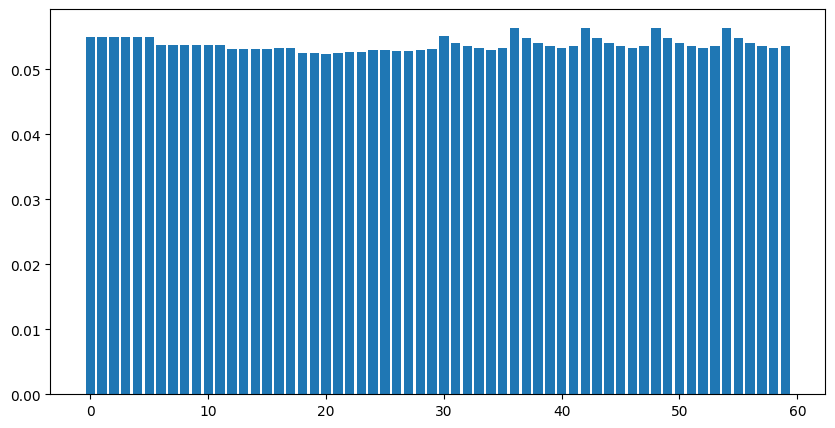

In [297]:
_ = plt.figure(figsize=(10, 5))
plt.bar(range(len(scores)), scores)
plt.show()

In [298]:
best_model_idx = np.argsort(scores)[0]
best_model = models[best_model_idx]
best_model

DecisionTreeRegressor(max_depth=6, min_samples_leaf=20)

C:\Users\furka\AppData\Local\Temp\ipykernel_18568\65374359.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(x, y_test[:100], marker="x", s=50, label='Real Data')


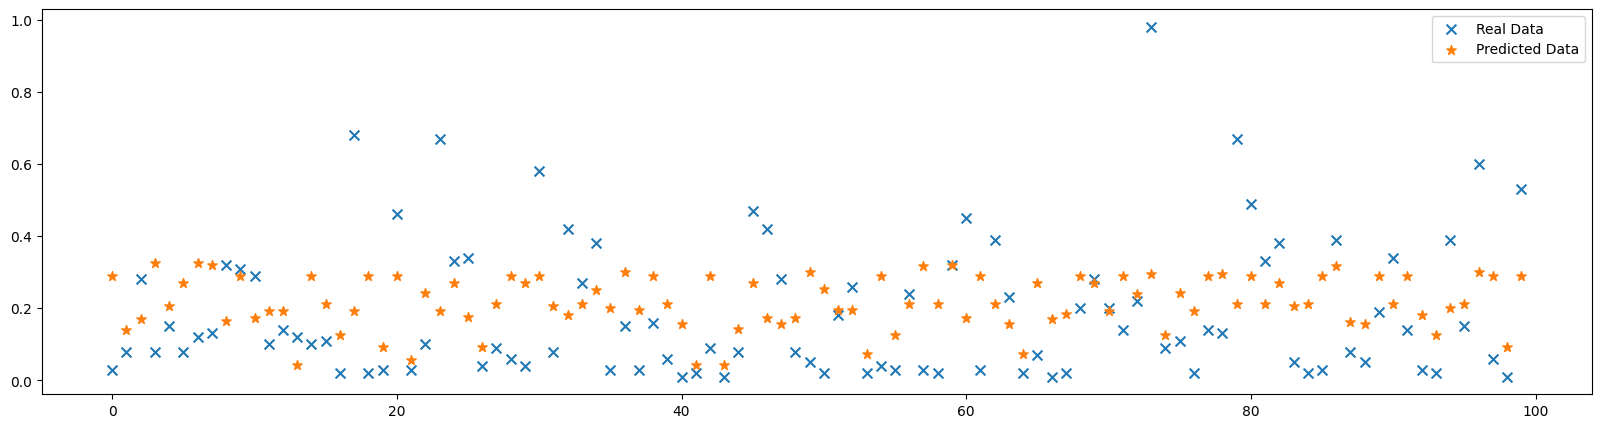

In [299]:
x = list(range(100))
y_pred = best_model.predict(X_test)
_ = plt.figure(figsize=(20, 5))
plt.scatter(x, y_test[:100], marker="x", s=50, label='Real Data')
plt.scatter(x, y_pred[:100], marker="*", s=50, label='Predicted Data')
plt.legend()
plt.show()

In [300]:
print(f"Mean Squared Error = {scores[best_model_idx]}.")

Mean Squared Error = 0.05244569664438616.


In [301]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {mae}")

Mean Absolute Error = 0.17123234932145673


In [302]:
features = ["Genre", "Platform", "Year"]
target = "Global_Sales"
X = df[features]
y = df[target]

In [303]:
scores = {}
for feature in features:
  X1 = X[feature].values.reshape(-1, 1)

  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

  best_model.fit(X_train, y_train)
  y_pred = best_model.predict(X_test)

  score = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  scores[feature] = score


In [304]:
scores

{'Genre': 0.18025442403485903,
 'Platform': 0.1770962756675629,
 'Year': 0.1831890182780367}